In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#READING DATA TEXT
#df= pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_230318.txt', header=0) 

In [35]:
num_weeks = 9

start_date = filedate = pd.Timestamp('2022-06-04 00:00:00')

filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
# http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt
filelist = []

for numfiles in range(num_weeks):

    filedate_str = str(filedate.year)[2:4] + str(
        filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    filedate += pd.Timedelta(days=7)

df = pd.concat(filelist, axis=0, ignore_index=True)

In [36]:
#SETTING COLUMNS NAMES
df.rename(columns={"EXITS                                                               " : "exits"}, inplace=True)
df.rename(columns={"STATION": "station"}, inplace=True)
df.rename(columns={"ENTRIES" : "entries"}, inplace=True)
df.rename(columns={"TIME" : "time"}, inplace=True)
df.rename(columns={"DATE" : "date"}, inplace=True)

In [37]:
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208
...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804


In [38]:
df.dtypes

C/A                 object
UNIT                object
SCP                 object
station             object
LINENAME            object
DIVISION            object
date        datetime64[ns]
time                object
DESC                object
entries              int64
exits                int64
dtype: object

In [39]:
df['dates'] = pd.to_datetime(df['date'])
df.dtypes

C/A                 object
UNIT                object
SCP                 object
station             object
LINENAME            object
DIVISION            object
date        datetime64[ns]
time                object
DESC                object
entries              int64
exits                int64
dates       datetime64[ns]
dtype: object

In [40]:
df['weekday'] = df['dates'].dt.day_name()
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039,2022-05-28,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047,2022-05-28,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080,2022-05-28,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155,2022-05-28,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208,2022-05-28,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804,2022-07-29,Friday
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804,2022-07-29,Friday
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804,2022-07-29,Friday
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804,2022-07-29,Friday


In [41]:
df["turnstile"] = df["C/A"] + "-" + df["UNIT"] + "-" + df["SCP"]
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039,2022-05-28,Saturday,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047,2022-05-28,Saturday,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080,2022-05-28,Saturday,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155,2022-05-28,Saturday,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208,2022-05-28,Saturday,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01


In [42]:
df = pd.DataFrame(df[df.DESC == "REGULAR"])
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,00:00:00,REGULAR,7717669,2709039,2022-05-28,Saturday,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,04:00:00,REGULAR,7717677,2709047,2022-05-28,Saturday,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,08:00:00,REGULAR,7717692,2709080,2022-05-28,Saturday,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,12:00:00,REGULAR,7717724,2709155,2022-05-28,Saturday,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-28,16:00:00,REGULAR,7717838,2709208,2022-05-28,Saturday,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,05:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,09:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,13:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01
1900791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-07-29,17:00:00,REGULAR,0,804,2022-07-29,Friday,TRAM2-R469-00-05-01


In [43]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['entries'].describe()


count      1892527.00
mean      42953523.84
std      223608087.22
min              0.00
25%         250377.50
50%        1337533.00
75%        5948624.50
max     2147285239.00
Name: entries, dtype: float64

In [44]:
df['exits'].describe()

count      1892527.00
mean      34326848.53
std      196204148.19
min              0.00
25%         137536.00
50%         895983.00
75%        3923919.00
max     2122272318.00
Name: exits, dtype: float64

In [45]:
df2=df.loc[df['entries'] > 0 , ["turnstile","time","station","entries","exits","weekday"]] #DROP ENTRIES COLUMNS < 0
df2

,turnstile,time,station,entries,exits,weekday
0,A002-R051-02-00-00,00:00:00,59 ST,7717669,2709039,Saturday
1,A002-R051-02-00-00,04:00:00,59 ST,7717677,2709047,Saturday
2,A002-R051-02-00-00,08:00:00,59 ST,7717692,2709080,Saturday
3,A002-R051-02-00-00,12:00:00,59 ST,7717724,2709155,Saturday
4,A002-R051-02-00-00,16:00:00,59 ST,7717838,2709208,Saturday
...,...,...,...,...,...,...
1900746,TRAM2-R469-00-05-00,05:00:00,RIT-ROOSEVELT,336786,0,Friday
1900747,TRAM2-R469-00-05-00,09:00:00,RIT-ROOSEVELT,336798,0,Friday
1900748,TRAM2-R469-00-05-00,13:00:00,RIT-ROOSEVELT,336824,0,Friday
1900749,TRAM2-R469-00-05-00,17:00:00,RIT-ROOSEVELT,336834,0,Friday


In [46]:
df2["entries_diff"] = df2["entries"].diff().fillna(0)
df2["exits_diff"] = df2["exits"].diff().fillna(0)
df2

,turnstile,time,station,entries,exits,weekday,entries_diff,exits_diff
0,A002-R051-02-00-00,00:00:00,59 ST,7717669,2709039,Saturday,0.00,0.00
1,A002-R051-02-00-00,04:00:00,59 ST,7717677,2709047,Saturday,8.00,8.00
2,A002-R051-02-00-00,08:00:00,59 ST,7717692,2709080,Saturday,15.00,33.00
3,A002-R051-02-00-00,12:00:00,59 ST,7717724,2709155,Saturday,32.00,75.00
4,A002-R051-02-00-00,16:00:00,59 ST,7717838,2709208,Saturday,114.00,53.00
...,...,...,...,...,...,...,...,...
1900746,TRAM2-R469-00-05-00,05:00:00,RIT-ROOSEVELT,336786,0,Friday,0.00,0.00
1900747,TRAM2-R469-00-05-00,09:00:00,RIT-ROOSEVELT,336798,0,Friday,12.00,0.00
1900748,TRAM2-R469-00-05-00,13:00:00,RIT-ROOSEVELT,336824,0,Friday,26.00,0.00
1900749,TRAM2-R469-00-05-00,17:00:00,RIT-ROOSEVELT,336834,0,Friday,10.00,0.00


In [47]:
#ent_diff & exts_diff columns turn float to obj
df2["entries_diff"]=df2["entries_diff"].astype(float)
df2["exits_diff"]=df2["exits_diff"].astype(float)

In [48]:
#"""1 kişi ort 2 saniyede geçiş yapar olarak hesapladım. 4 saatte yaklaşık 7200 kişi. bu değeri maks değer kabul edip
#üstünde olan değerleri aykırı değer varsayıyorum""" çıkış için 2 saniyede 1 kişi hesapladım ve 7200 maks sayısını buldum


df3= df2.loc[(df2["entries_diff"] >=0) & (df2["entries_diff"] < 7500 ) & (df2["exits_diff"] > 0) & (df2["exits_diff"])]
df3

,turnstile,time,station,entries,exits,weekday,entries_diff,exits_diff
1,A002-R051-02-00-00,04:00:00,59 ST,7717677,2709047,Saturday,8.00,8.00
2,A002-R051-02-00-00,08:00:00,59 ST,7717692,2709080,Saturday,15.00,33.00
3,A002-R051-02-00-00,12:00:00,59 ST,7717724,2709155,Saturday,32.00,75.00
4,A002-R051-02-00-00,16:00:00,59 ST,7717838,2709208,Saturday,114.00,53.00
5,A002-R051-02-00-00,20:00:00,59 ST,7717947,2709229,Saturday,109.00,21.00
...,...,...,...,...,...,...,...,...
1900703,TRAM2-R469-00-03-01,01:00:00,RIT-ROOSEVELT,3232756,403487,Friday,9.00,3.00
1900704,TRAM2-R469-00-03-01,05:00:00,RIT-ROOSEVELT,3232756,403488,Friday,0.00,1.00
1900706,TRAM2-R469-00-03-01,13:00:00,RIT-ROOSEVELT,3232816,403496,Friday,53.00,8.00
1900707,TRAM2-R469-00-03-01,17:00:00,RIT-ROOSEVELT,3232910,403506,Friday,94.00,10.00


In [49]:
df3.sort_values(by='entries_diff')
grouped_station=df3.groupby(['station'])['entries_diff']
grouped_station

In [50]:
df3.dtypes

turnstile        object
time             object
station          object
entries           int64
exits             int64
weekday          object
entries_diff    float64
exits_diff      float64
dtype: object

In [62]:
station_entries=df3.groupby(['station']).agg({'entries_diff':'sum' , 'exits_diff':'sum'} ).head(10).reset_index()
station_entries

,station,entries_diff,exits_diff
0,1 AV,419037.00,1013341.00
1,103 ST,686803.00,909158.00
2,103 ST-CORONA,598912.00,786910.00
3,104 ST,104074.00,73741.00
4,110 ST,241956.00,393044.00
5,111 ST,484938.00,442353.00
6,116 ST,710017.00,796179.00
7,116 ST-COLUMBIA,220775.00,253805.00
8,121 ST,70163.00,50043.00
9,125 ST,1631585.00,2497115.00


In [87]:
df3['station_ent_exts']=df3['entries_diff'].sum() + df3['exits_diff'].sum()
graph=df3.groupby(['station'])['station_ent_exts'].sum().sort_values(ascending=False).reset_index().head(10)
graph

C:\Users\ali_t\AppData\Local\Temp\ipykernel_13820\2011910246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['station_ent_exts']=df3['entries_diff'].sum() + df3['exits_diff'].sum()


,station,station_ent_exts
0,34 ST-PENN STA,49106803118760.00
1,GRD CNTRL-42 ST,42962224620492.00
2,FULTON ST,41146547835528.00
3,23 ST,33957112559472.00
4,86 ST,30938311770912.00
5,TIMES SQ-42 ST,29872938871260.00
6,CANAL ST,28145188322856.00
7,59 ST,28074847333608.00
8,34 ST-HERALD SQ,27786156190236.00
9,CHAMBERS ST,26895170326428.00


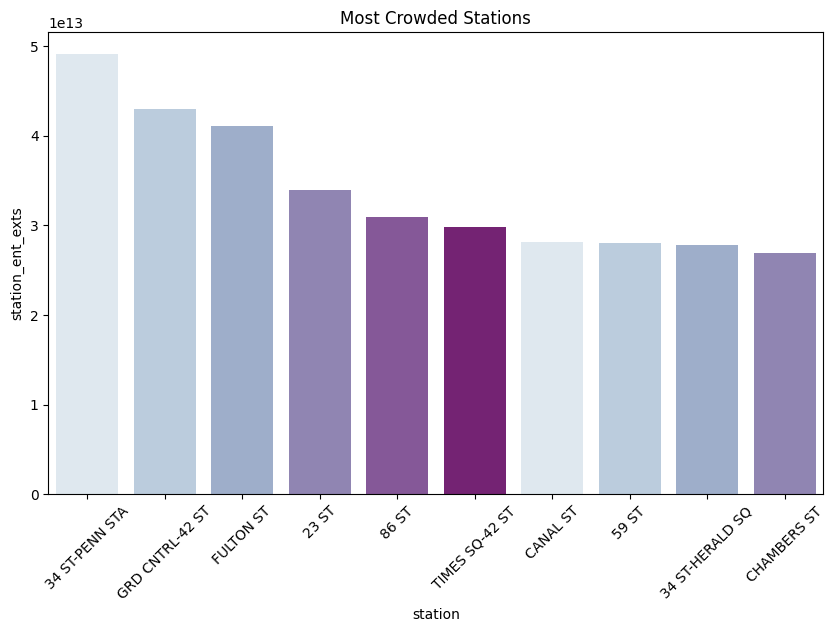

In [90]:
plt.figure(figsize = (10,6,))
plt.xticks(rotation=45)
plt.title('Most Crowded Stations')
sns.barplot(x =graph['station'] , y=graph['station_ent_exts'], palette = sns.color_palette("BuPu"));


In [91]:
df3["time2"] = df3["time"].astype(str).str[:2]
df3["time2"].astype(int) 

C:\Users\ali_t\AppData\Local\Temp\ipykernel_13820\2350251446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["time2"] = df3["time"].astype(str).str[:2]


1           4
2           8
3          12
4          16
5          20
           ..
1900703     1
1900704     5
1900706    13
1900707    17
1900708    21
Name: time2, Length: 1565959, dtype: int32

In [92]:
crowded_hourly = df3.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)
crowded_hourly


time2
03      4642
23      6231
15      6419
07      6568
11      6766
19      6820
02      8709
06     10463
14     11094
10     11174
22     11324
18     11481
01     88945
05     96558
09    104654
13    105062
21    105565
17    105869
00    126102
04    138203
08    147099
12    148171
16    148865
20    149175
Name: entries_diff, dtype: int64

In [93]:
crowded_hourly2 = df3[df3["time2"].between("00","03")]
group_by_time04 =(crowded_hourly2.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly3 = df3[df3["time2"].between("04","07")]
group_by_time48 =(crowded_hourly3.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly4 = df3[df3["time2"].between("08","11")]
group_by_time812 =(crowded_hourly4.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly5 = df3[df3["time2"].between("12","15")]
group_by_time1216=(crowded_hourly5.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly6 = df3[df3["time2"].between("16","19")]
group_by_time1620 =(crowded_hourly6.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly7 = df3[df3["time2"].between("20","23")]
group_by_time2024 =(crowded_hourly7.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()


result={"Hours" : ["00-04","04-08","08-12","12-16","16-20","20-24"],
                    "intensity" :[group_by_time04,group_by_time48,group_by_time812,group_by_time1216,group_by_time1620,group_by_time2024]}
result
result2 =pd.DataFrame(data=result, index=[0,1,2,3,4,5])
result2

,Hours,intensity
0,00-04,228398
1,04-08,251792
2,08-12,269693
3,12-16,270746
4,16-20,273035
5,20-24,272295


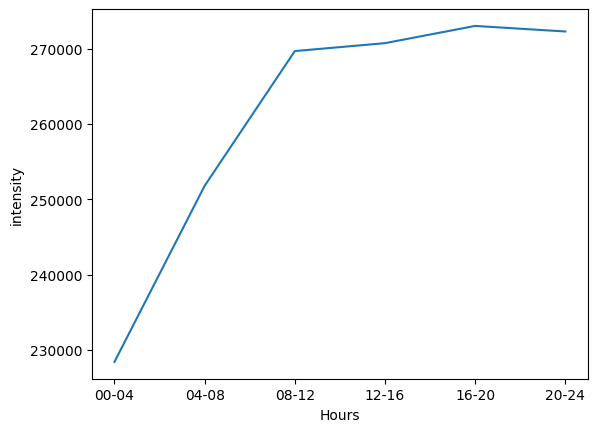

In [95]:
sns.lineplot(data = result2, x = "Hours" , y = 'intensity'); 

In [101]:
df3['station_ent_exts']=df3['entries_diff'].sum() + df3['exits_diff'].sum()
graph2=df3.groupby(['weekday'])['station_ent_exts'].sum().sort_values(ascending=False).reset_index().head(10)
graph2

C:\Users\ali_t\AppData\Local\Temp\ipykernel_13820\2915175088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['station_ent_exts']=df3['entries_diff'].sum() + df3['exits_diff'].sum()


,weekday,station_ent_exts
0,Friday,340812350967492.00
1,Thursday,340375650659244.00
2,Wednesday,340097217576804.00
3,Tuesday,338929264067832.00
4,Monday,335441523350952.00
5,Sunday,326244439006776.00
6,Saturday,272914245658584.00


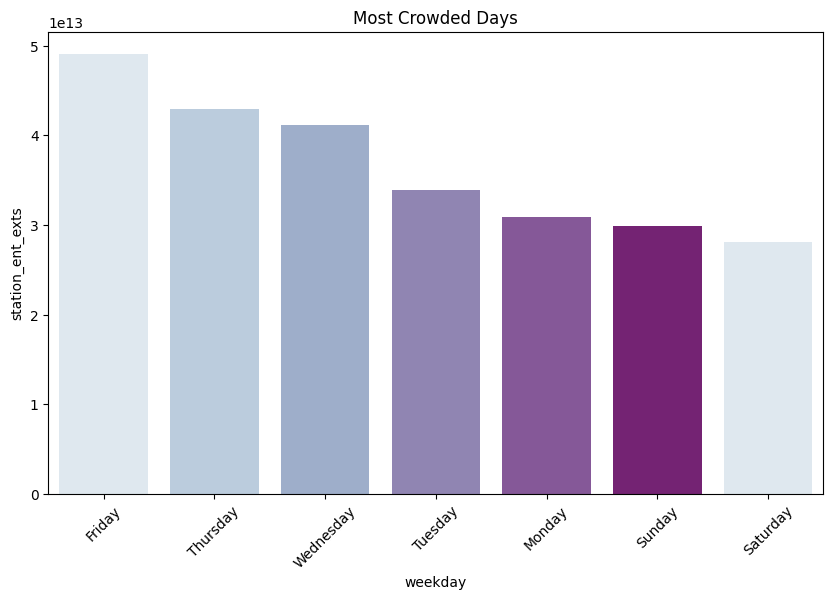

In [103]:
plt.figure(figsize = (10,6,))
plt.xticks(rotation=45)
plt.title('Most Crowded Days')
sns.barplot(x =graph2['weekday'] , y=graph['station_ent_exts'], palette = sns.color_palette("BuPu"));